# Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error


In [2]:
df = pd.read_csv("Datasets/appliance_energy.csv")

df

,Temperature (°C),Energy Consumption (kWh)
0,22.490802,2.292604
1,34.014286,3.251925
2,29.639879,3.009868
3,26.973170,1.703533
4,18.120373,1.702201
...,...,...
95,24.875912,2.079686
96,25.454657,2.506915
97,23.550820,2.525658
98,15.508383,1.689184


In [3]:
df.isnull().count()

Temperature (°C)            100
Energy Consumption (kWh)    100
dtype: int64

In [4]:
df.shape

(100, 2)

In [5]:
df.size

200

In [6]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


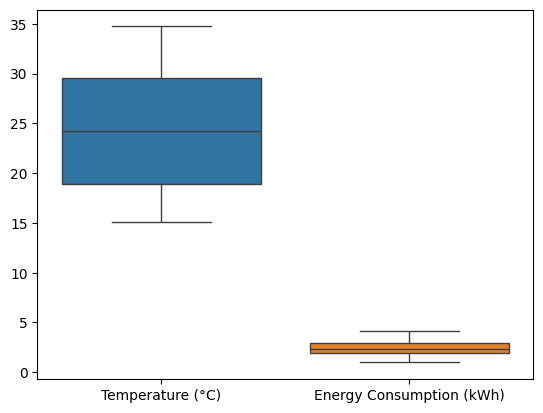

In [7]:
sns.boxplot(df)
plt.show()

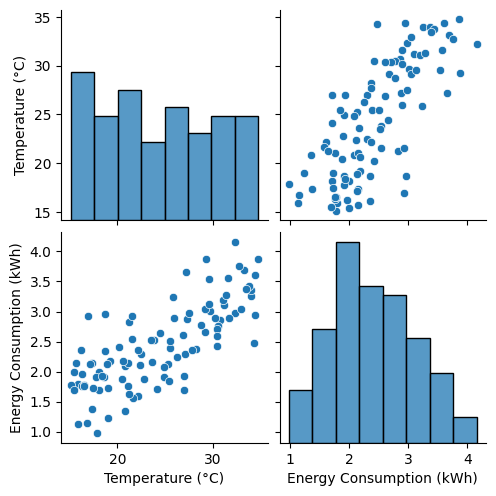

In [8]:
sns.pairplot(df)
plt.show()

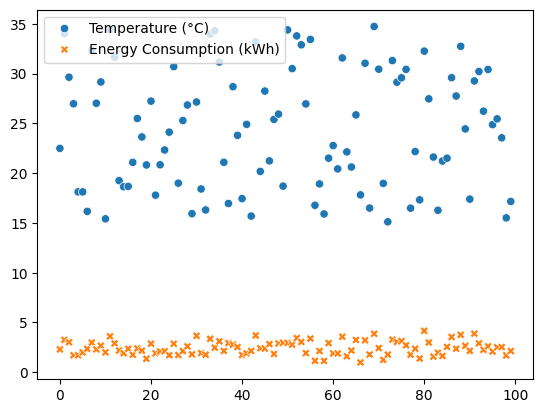

In [9]:
sns.scatterplot(df)
plt.show()

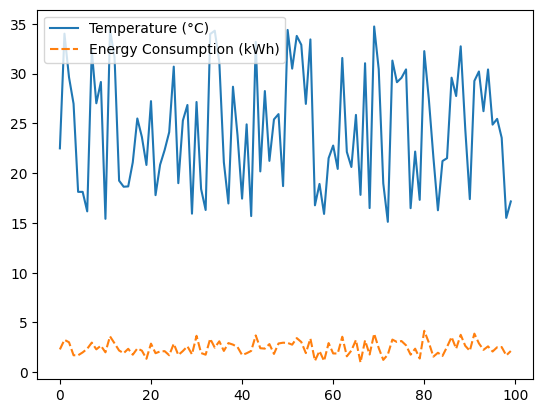

In [10]:
sns.lineplot(df)
plt.show()

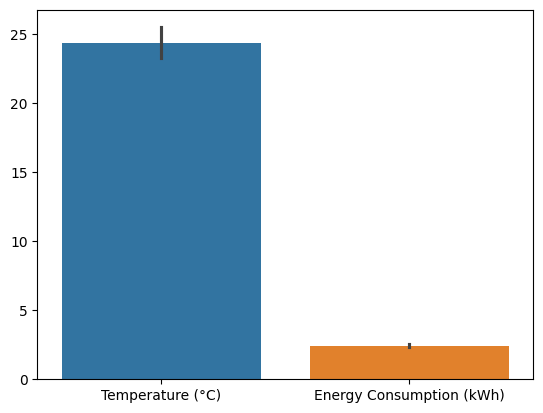

In [11]:
sns.barplot(df)
plt.show()

In [12]:
df_x=df[['Temperature (°C)']]
print(df_x)

    Temperature (°C)
0          22.490802
1          34.014286
2          29.639879
3          26.973170
4          18.120373
..               ...
95         24.875912
96         25.454657
97         23.550820
98         15.508383
99         17.157829

[100 rows x 1 columns]


In [13]:
df_y=df['Energy Consumption (kWh)']
print(df_y)

0     2.292604
1     3.251925
2     3.009868
3     1.703533
4     1.702201
        ...   
95    2.079686
96    2.506915
97    2.525658
98    1.689184
99    2.129374
Name: Energy Consumption (kWh), Length: 100, dtype: float64


In [31]:
x_train, x_test, y_train, y_test=train_test_split(df_x, df_y, test_size=0.2, random_state=40)

In [32]:
reg=linear_model.LinearRegression()

In [33]:
reg.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [34]:
print(reg.coef_)

[0.08394888]


In [35]:
y_pred=reg.predict(x_test)
print(y_pred)

[1.86035492 2.88980011 2.26479423 1.97374543 2.81462533 3.29427034
 1.87071283 2.77817348 2.40481956 3.05724513 2.89080584 1.92776517
 2.53899595 2.5292015  2.71231699 2.54686769 2.22138375 3.25897098
 2.8546514  2.94315446]


In [36]:
mean_squared_error(y_test,y_pred)

0.15688560358921597

In [37]:
r2_score(y_test,y_pred)

0.6823667793914241

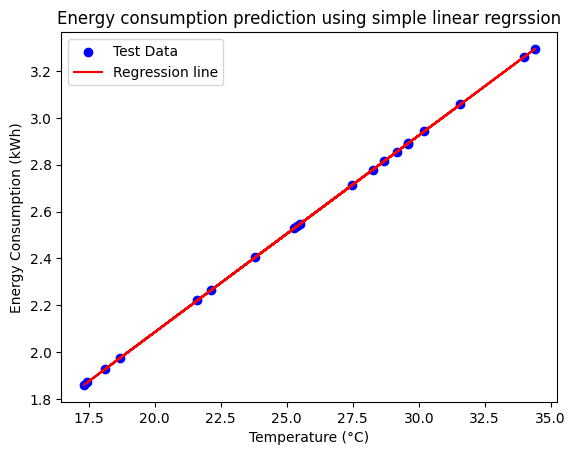

In [39]:
plt.scatter(x_test, y_pred, color='blue', label='Test Data')
plt.plot(x_test, y_pred, color='red', label='Regression line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy consumption prediction using simple linear regrssion')
plt.show()

